In [1]:
# Importing the necessary libraries
import tensorflow as tf
import numpy as np
import matplotlib.pyplot as plt
from tensorflow.keras.datasets.fashion_mnist import load_data
from tensorflow.keras.models import Sequential, Model
from tensorflow.keras.layers import Flatten, Dense, Reshape
from tensorflow.keras.metrics import binary_accuracy
from tensorflow.keras.optimizers import SGD

In [2]:
# Loading the data
(x_train_full, y_train_full), (x_test, y_test) = load_data()

In [3]:
x_train_full = x_train_full.astype(np.float32) / 255
x_test = x_test.astype(np.float32) / 255

In [4]:
x_train, x_valid = x_train_full[:-5000], x_train_full[-5000:]
y_train, y_valid = y_train_full[:-5000], y_train_full[-5000:]

In [5]:
# Creating the encoder model
stacked_encoder = Sequential([
    Flatten(input_shape=[28,28]),
    Dense(100, activation='selu'),
    Dense(30, activation='selu', name='30UnitsDense')
])

In [6]:
# Creating the decoder model
stacked_decoder = Sequential([
    Dense(100, activation='selu', input_shape=[30],),
    Dense(784, activation='sigmoid'),
    Reshape([28, 28])
])

In [7]:
# Creating the autoencoder model by combining the encoder and the decoder models
stacked_autoencoder = Sequential([stacked_encoder, stacked_decoder])

In [8]:
def rounded_accuracy(y_true, y_pred):
    return binary_accuracy(tf.round(y_true), tf.round(y_pred))

* **binary_accuracy** is used to compute the **accuracy of binary classification models** in TensorFlow. This metric measures how often predictions match binary labels.

In [9]:
optimizer = SGD(learning_rate=1.5)

In [10]:
# Compiling the autoencoder model
stacked_autoencoder.compile(loss='binary_crossentropy', optimizer=optimizer, metrics=[rounded_accuracy])

In [11]:
stacked_autoencoder.summary()

Model: "sequential_2"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 sequential (Sequential)     (None, 30)                81530     
                                                                 
 sequential_1 (Sequential)   (None, 28, 28)            82284     
                                                                 
Total params: 163,814
Trainable params: 163,814
Non-trainable params: 0
_________________________________________________________________


In [12]:
stacked_autoencoder.layers[0].output

<KerasTensor: shape=(None, 30) dtype=float32 (created by layer '30UnitsDense')>

In [13]:
x_train.shape

(55000, 28, 28)

In [14]:
history = stacked_autoencoder.fit(x_train, x_train, epochs=10, validation_data=(x_valid, x_valid))

Epoch 1/10
1719/1719 [==============================] - 9s 5ms/step - loss: 0.3366 - rounded_accuracy: 0.8885 - val_loss: 0.3120 - val_rounded_accuracy: 0.9134
Epoch 2/10
1719/1719 [==============================] - 8s 5ms/step - loss: 0.3044 - rounded_accuracy: 0.9164 - val_loss: 0.3017 - val_rounded_accuracy: 0.9198
Epoch 3/10
1719/1719 [==============================] - 8s 5ms/step - loss: 0.2975 - rounded_accuracy: 0.9227 - val_loss: 0.2954 - val_rounded_accuracy: 0.9265
Epoch 4/10
1719/1719 [==============================] - 8s 5ms/step - loss: 0.2932 - rounded_accuracy: 0.9267 - val_loss: 0.2945 - val_rounded_accuracy: 0.9248
Epoch 5/10
1719/1719 [==============================] - 8s 5ms/step - loss: 0.2905 - rounded_accuracy: 0.9290 - val_loss: 0.2911 - val_rounded_accuracy: 0.9298
Epoch 6/10
1719/1719 [==============================] - 8s 5ms/step - loss: 0.2887 - rounded_accuracy: 0.9306 - val_loss: 0.2886 - val_rounded_accuracy: 0.9328
Epoch 7/10
1719/1719 [==================

In [15]:
def plot_image(image):
    plt.imshow(image, cmap='binary')
    plt.axis('off')

In [16]:
def show_reconstruction(model, images=x_valid, n_images=3):
    reconstructions = model.predict(images[:n_images])
    print(reconstructions[0].shape)
    fig = plt.figure(figsize=(n_images * 1.5, 3))
    for image_index in range (n_images):
        plt.subplot(2, n_images, 1 + image_index)
        plot_image(images[image_index])
        plt.subplot(2, n_images, 1 + n_images + image_index)
        plot_image(reconstructions[image_index])

1/1 [==============================] - 0s 88ms/step
(28, 28)


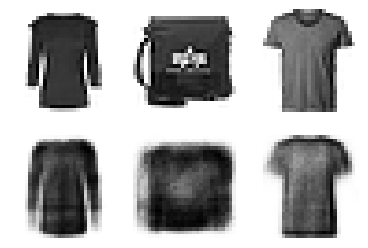

In [17]:
show_reconstruction(stacked_autoencoder)

1/1 [==============================] - 0s 22ms/step


<tf.Variable '30UnitsDense/bias:0' shape=(30,) dtype=float32, numpy=
array([-0.04286745, -0.1128528 , -0.14493501,  0.1047961 ,  0.3177184 ,
       -0.10948526, -0.05752736, -0.06129047, -0.0971102 ,  0.03603799,
       -0.08518586,  0.22715914, -0.07127549,  0.03397033, -0.09288227,
        0.10279129,  0.0047334 ,  0.03726342,  0.17378785,  0.07712601,
        0.20645334, -0.09766605,  0.26335672, -0.11568721, -0.04436362,
       -0.01708291, -0.08465092, -0.10121089, -0.03602143, -0.03799267],
      dtype=float32)>

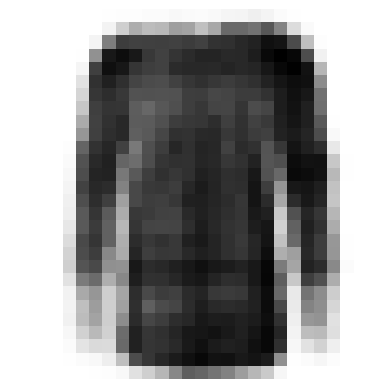

In [18]:
plot_image(stacked_autoencoder.predict(x_valid[:1])[0])
stacked_autoencoder.layers[0].weights[3]

1/1 [==============================] - 0s 20ms/step


<tf.Variable '30UnitsDense/bias:0' shape=(30,) dtype=float32, numpy=
array([-0.04286745, -0.1128528 , -0.14493501,  0.1047961 ,  0.3177184 ,
       -0.10948526, -0.05752736, -0.06129047, -0.0971102 ,  0.03603799,
       -0.08518586,  0.22715914, -0.07127549,  0.03397033, -0.09288227,
        0.10279129,  0.0047334 ,  0.03726342,  0.17378785,  0.07712601,
        0.20645334, -0.09766605,  0.26335672, -0.11568721, -0.04436362,
       -0.01708291, -0.08465092, -0.10121089, -0.03602143, -0.03799267],
      dtype=float32)>

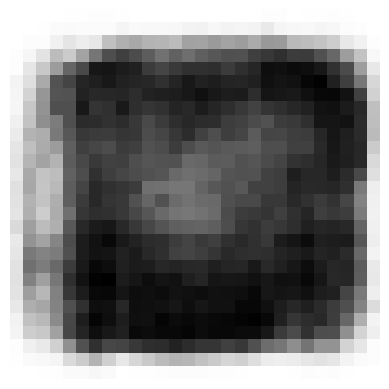

In [19]:
plot_image(stacked_autoencoder.predict(x_valid[1:2])[0])
stacked_autoencoder.layers[0].weights[3]

In [20]:
print(stacked_autoencoder.summary())
print(stacked_autoencoder.get_layer(index=0).name)
print(stacked_autoencoder.get_layer(index=0).output)

Model: "sequential_2"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 sequential (Sequential)     (None, 30)                81530     
                                                                 
 sequential_1 (Sequential)   (None, 28, 28)            82284     
                                                                 
Total params: 163,814
Trainable params: 163,814
Non-trainable params: 0
_________________________________________________________________
None
sequential
KerasTensor(type_spec=TensorSpec(shape=(None, 30), dtype=tf.float32, name=None), name='30UnitsDense/Selu:0', description="created by layer '30UnitsDense'")


In [21]:
# Creating the encoder model
stacked_autoencoder = Sequential([
    Flatten(input_shape=[28,28]),
    Dense(100, activation='selu'),
    Dense(30, activation='selu', name='30UnitsDense'),
    Dense(100, activation='selu', input_shape=[30],),
    Dense(784, activation='sigmoid'),
    Reshape([28, 28])
])

# Compiling the autoencoder model
stacked_autoencoder.compile(loss='binary_crossentropy', optimizer=optimizer, metrics=[rounded_accuracy])

history = stacked_autoencoder.fit(x_train, x_train, epochs=2, validation_data=(x_valid, x_valid))

Epoch 1/2
1719/1719 [==============================] - 16s 9ms/step - loss: 0.3380 - rounded_accuracy: 0.8870 - val_loss: 0.3249 - val_rounded_accuracy: 0.8877
Epoch 2/2
1719/1719 [==============================] - 11s 6ms/step - loss: 0.3057 - rounded_accuracy: 0.9152 - val_loss: 0.3033 - val_rounded_accuracy: 0.9166


In [22]:
feature_extractor_encoder = Model(
    inputs = stacked_autoencoder.inputs,
    outputs = stacked_autoencoder.get_layer(index=2).output
)

In [23]:
codings = feature_extractor_encoder(x_valid[0:2])
codings

<tf.Tensor: shape=(2, 30), dtype=float32, numpy=
array([[ 4.4944572 , -1.7580948 , -1.7580862 ,  5.7969036 ,  3.473222  ,
        -1.7578306 , -1.7529477 , -1.7573869 , -1.7480736 ,  4.54281   ,
        -1.758099  ,  6.2170086 , -1.7579262 , 10.747063  , -1.7563767 ,
         9.796109  ,  4.850867  , 15.807031  ,  1.3321626 , 16.831022  ,
         4.8214684 , -1.7578714 , -1.7577103 ,  8.436985  , -1.7575511 ,
        -1.7577019 ,  3.7045412 , -1.7565274 , -1.7552232 , -0.5512235 ],
       [ 2.6228287 , -1.7580976 , -1.7580208 ,  3.6967573 ,  3.7909493 ,
        -1.758036  , -1.7579288 , -1.7575802 , -1.7427933 , 12.269539  ,
        -1.7580993 , -1.3279312 , -1.7579436 ,  7.170279  , -0.5330188 ,
        10.862003  ,  3.285399  ,  8.136416  , -1.7155318 , 17.359926  ,
         3.3503778 , -1.7559755 , -1.7576404 , -1.3103298 , -1.7563967 ,
        -1.757972  ,  4.702603  , -1.7572445 , -1.7514167 ,  0.56950814]],
      dtype=float32)>

In [24]:
feature_extractor_encoder.summary()

Model: "model"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 flatten_1_input (InputLayer  [(None, 28, 28)]         0         
 )                                                               
                                                                 
 flatten_1 (Flatten)         (None, 784)               0         
                                                                 
 dense_3 (Dense)             (None, 100)               78500     
                                                                 
 30UnitsDense (Dense)        (None, 30)                3030      
                                                                 
Total params: 81,530
Trainable params: 81,530
Non-trainable params: 0
_________________________________________________________________
